# Deep learning project: Colorizing black and white images

## 0. Introduction
This notebook contains the code and results for the project done by Eric Johansson and Per Ljung in the course Deep machine learning (SSY340/DAT968). The main objective is to take black and white images as input and colorize them using <font color='red'>whatever we end up using</font>. <font color='green'>Further explore possibility of sequences of images.</font>

## 1. Collecting and pre-processing of data
As dataset we first use the MIT Places image database. The goal of this section is to
<ol>
  <li>Download the data from MIT Places.</li>
  <li>Split the data into training, validation and testing datasets.</li>
  <li>Provide a function that can turn a colorful image into black and white format.</li>
</ol>
We begin by importing necessary modules for the project.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import torch
import torch.nn as nn
import torch.nn.functional as F

from torchvision import transforms, datasets

import os

### 1.1 Download data from MIT Places
To begin with, we will use a subset of the dataset Places205 from <a href="http://places.csail.mit.edu">MIT Places</a>, which is an image dataset containing 2,448,873 images from 205 scene categories. Our subset contains 41,000 images. In ubuntu, this can be done immediately in the terminal by the command
```
wget http://data.csail.mit.edu/places/places205/testSetPlaces205_resize.tar.gz -P path/to/project
```
and extract it. The code below takes the images and divides them into training and validation data.

In [7]:
# Divide data into training (40,000 images) and validation (1,000 images)
os.makedirs('images/train/', exist_ok=True)
os.makedirs('images/val/', exist_ok=True)
for i, file in enumerate(os.listdir('testSetPlaces205_resize/testSet_resize')):
  if i < 1000:
    os.rename('testSetPlaces205_resize/testSet_resize/' + file, 'images/val/' + file)
  else:
    os.rename('testSetPlaces205_resize/testSet_resize/' + file, 'images/train/' + file)

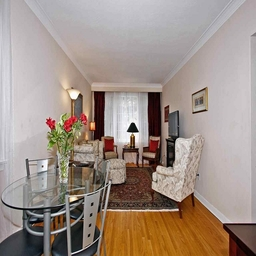

In [10]:
# Display an example image
from IPython.display import Image, display
display(Image(filename='images/val/05a9f2407d947da825a7f51661dd2c47.jpg'))